In [1]:
# Modified from https://pbpython.com/waterfall-chart.html

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
def draw_waterfall(df, ax=None, stocks=None, title=None):
    """Draws waterfall chart

    Args:
        df: Chart data as DataFrame.
        ax(optional): Axes. The current axes is used by default.
        stocks(optional): Column indexes (e.g. [0, 5]) indicating balance items. [0] by default.
        title(optional): Graph title string.
    """
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        
    if stocks is None:
        stocks = [0]

    cols = len(df.columns)
    cumsum = df.copy()
    bottom = df.copy()
    bottom.iloc[:,:] = 0

    for c in range(cols):
        if (c + 1) % cols in stocks:
            cumsum.iloc[:, list(range(c + 1))] = 0
            bottom.iloc[:, c] = 0
        else:
            bottom.iloc[:, c] = cumsum.cumsum(axis=1).iloc[:, c]

    data = df.stack()
    bottom = bottom.stack().shift(1, axis=0).fillna(0)

    palette = WaterfallColorPalette(df)
    xlabel = [idx[1] + '(' + str(idx[0]) + ')' for idx in df.stack().index]
    ax = sns.barplot(data=[[i] for i in data], bottom=list(bottom),
                     palette=palette.colors,
                     ax=ax)
    ax.set_xticklabels(labels=xlabel, rotation='vertical')
    if title:
        ax.set_title(title)
    ax.get_figure().tight_layout()
    return ax

class WaterfallColorPalette:
    """Returns color palette for drawing waterfall bars"""
    
    def __init__(self, data, length=None):

        self.data = data
        if length is None:
            self.length = len(data.columns)
        else:
            self.length = length

        self.paired = plt.get_cmap('Paired').colors
        self.colors = self.set_colors()

    def set_colors(self):

        result = []
        row_count, _ = self.data.shape

        for row in range(row_count):
            for col in range(self.length):
                sign = self.data.iloc[row, col] >= 0
                result.append(self.get_color(col, sign))

        return result

    def get_color(self, idx, sign):
        pair_count = len(self.paired) // 2
        idx = 2 * (idx % pair_count)
        return self.paired[idx + 1] if sign else self.paired[idx]

In [3]:
import numpy as np
df = pd.DataFrame({"Balance": [100, 105, 110],
                   "Premiums": [20, 25, 25],
                   "Claims": [-10, -15, -15],
                   "Expenses": [-5, -5, -5]})

df

,Balance,Premiums,Claims,Expenses
0,100,20,-10,-5
1,105,25,-15,-5
2,110,25,-15,-5


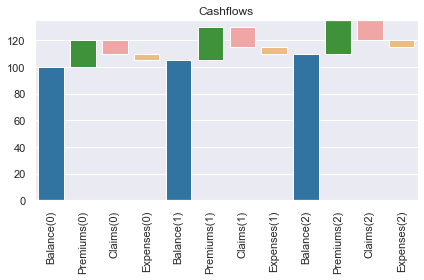

In [4]:
draw_waterfall(df, title="Cashflows")